<p><a href="https://www.asu.edu.eg/"><img align="right" src="https://ums.asu.edu.eg/images/logo.png" width="100" /></a></p>
<div align=left>
<h1>
  Body Signal of Smoking 🚭
</h1>
    <h5>
        Data Analytics project
    </h5>
</div>
<br>
<br>

## Introduction
This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals.

## All libraries we need through the notebook

In [1]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
from collections import Counter #for outliers detection
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
import plotly.express as px #for scatter 3d
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # for encoding and standardization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
%matplotlib inline

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Reading the dataset

In [2]:
df = pd.read_csv('smoking.csv')
df.head(n = 10).style.background_gradient(cmap = "Blues")

In [3]:
# Drop ID
df = df.drop("ID", axis = 1)

In [4]:
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

####
#### We see thet the dataset attributes are divided into dependent and independent attributes.
#### The inedependent attributes are :
- `ID` : index
- `Gender`: The gender of the individual.
- `Age`: Age of the individual categorized into 5-year gaps.
- `Height`: Height of the individual in centimeters.
- `Weight`: Weight of the individual in kilograms.
- `Waist circumference`: Measurement of the individual's waist circumference in centimeters.
- `Eyesight (left)`: Assessment of the individual's eyesight in the left eye.
- `Eyesight (right)`: Assessment of the individual's eyesight in the right eye.
- `Hearing (left)`: Assessment of the individual's hearing ability in the left ear.
- `Hearing (right)`: Assessment of the individual's hearing ability in the right ear.
- `Systolic Blood Pressure`: Measurement of the pressure in the arteries when the heart beats.
- `Diastolic Blood Pressure`: Measurement of the pressure in the arteries when the heart is at rest.
- `Fasting Blood Sugar`: Measurement of blood sugar level after an overnight fast.
- `Cholesterol (total)`: Total cholesterol level in the blood.
- `Triglyceride`: Measurement of the level of triglycerides in the blood.
- `HDL Cholesterol`: Measurement of high-density lipoprotein (HDL) cholesterol level.
- `LDL Cholesterol`: Measurement of low-density lipoprotein (LDL) cholesterol level.
- `Hemoglobin`: Measurement of the amount of hemoglobin in the blood.
- `Urine Protein`: Presence of protein in the urine.
- `Serum Creatinine`: Measurement of the creatinine level in the blood.
- `AST` (glutamic oxaloacetic transaminase): Measurement of liver enzyme AST level.
- `ALT` (glutamic oxaloacetic transaminase): Measurement of liver enzyme ALT level.
- `GTP`: an energy-rich nucleotide analogous to ATP.
- `Oral Examination Status`: Status of oral examination.
- `Dental Caries`: Presence or absence of dental caries (cavities).
- `Tartar Status`: Status of tartar (hardened plaque) accumulation on teeth.<br>
#### The dependent attribute or (The target variable) is :
- `smoking`: NO smoking = N, YES smoking = Y

# Data Cleaning

In [5]:
# Checking the nulls
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [6]:
df.shape

(55692, 26)

In [7]:
# Droping the redundant data
#df = df.drop_duplicates()

In [8]:
df.shape

(55692, 26)

##### We see that there is no nulls in our dataset & we have removed the redundant data from our dataset<br>

### Checking and Removing the Outliers

In [9]:
df.head(n = 10).style.background_gradient(cmap = "Blues")

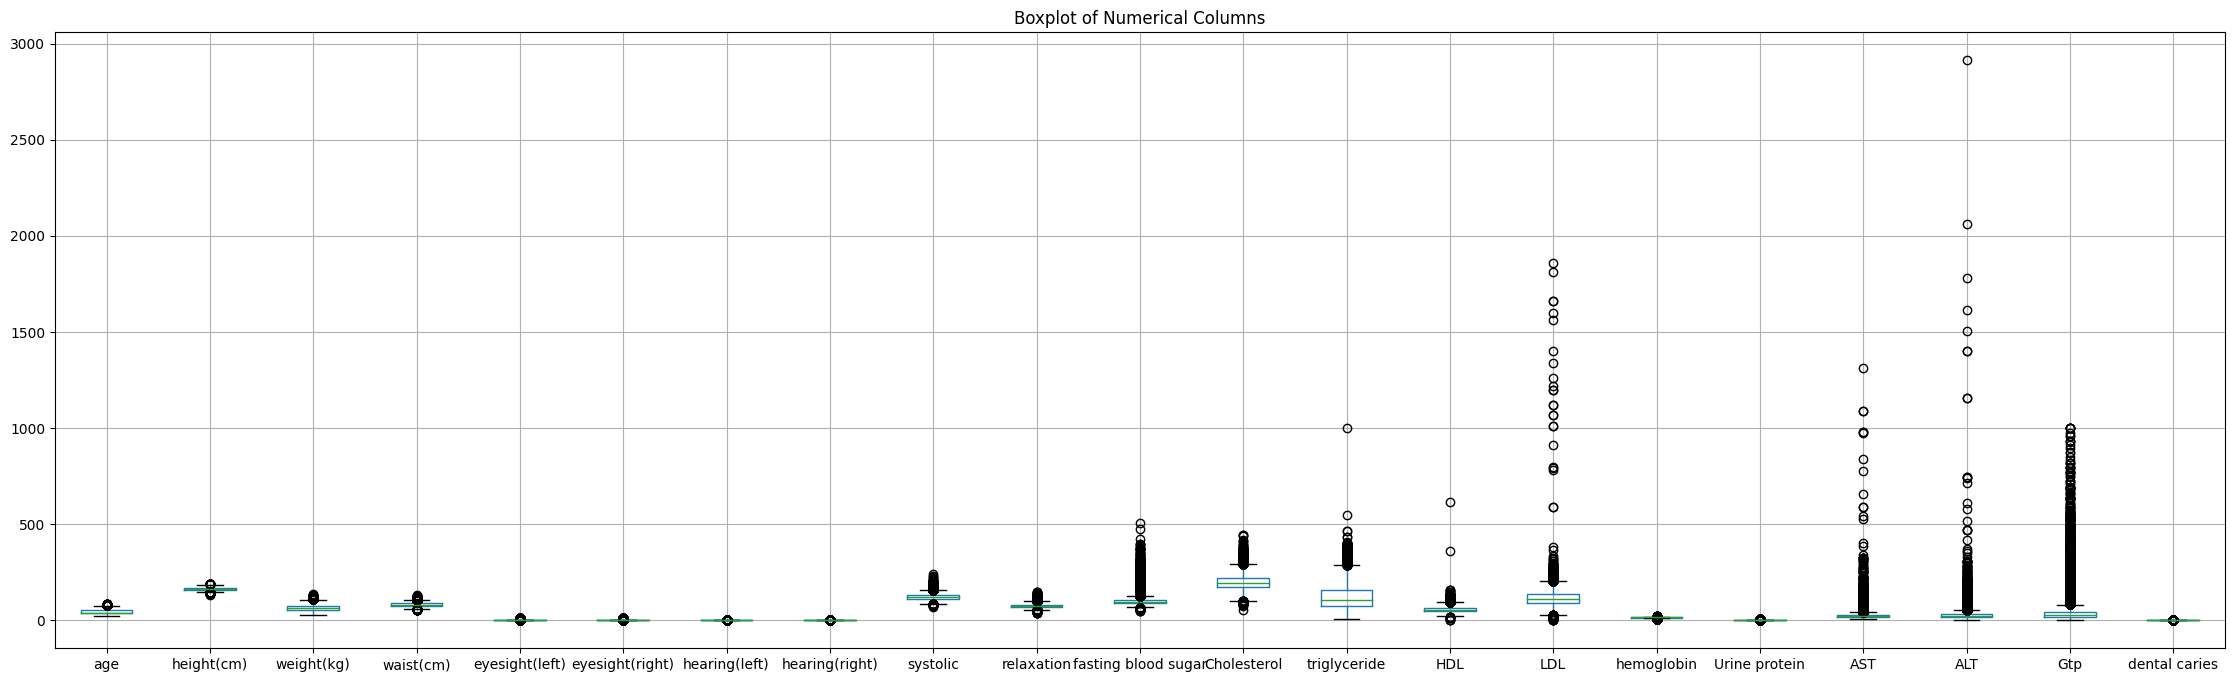

In [10]:
# Specify the columns to plot
numeric_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'AST', 'ALT', 'Gtp', 'dental caries']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(28,8))

# Create the boxplot
df[numeric_cols].boxplot(ax=ax)

# Set the plot title
ax.set_title('Boxplot of Numerical Columns')

# Show the plot
plt.show()

#### Plotting each column

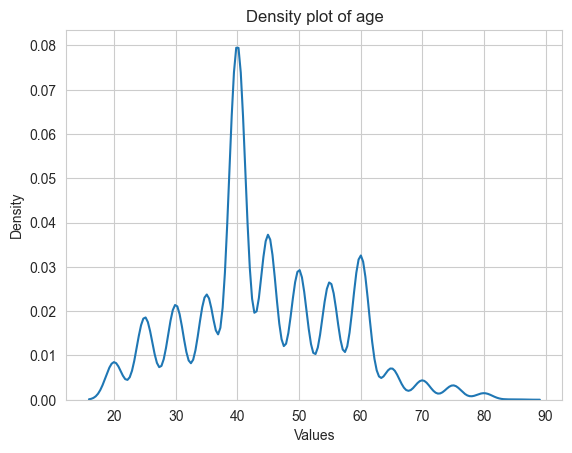

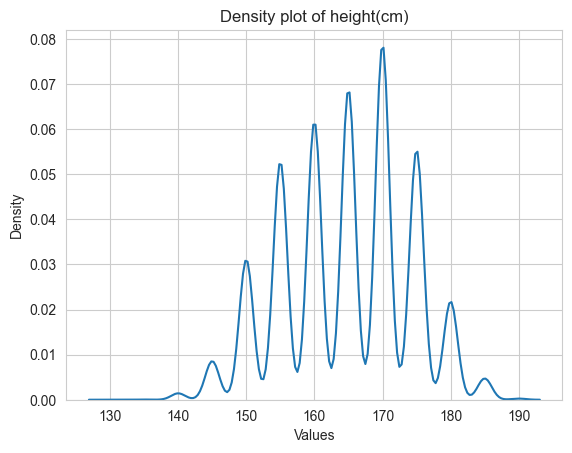

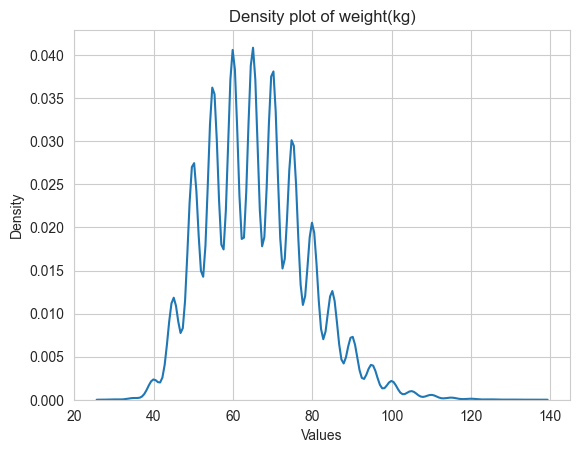

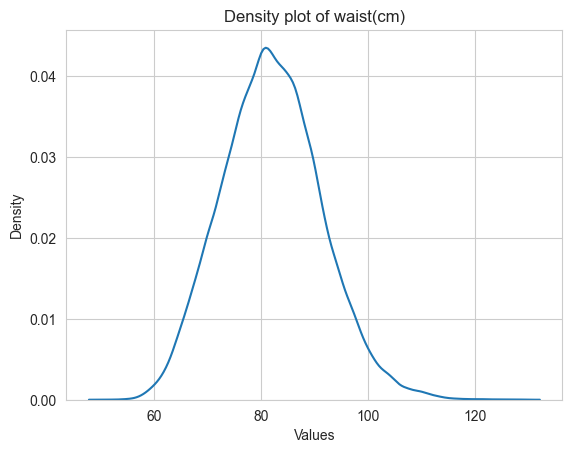

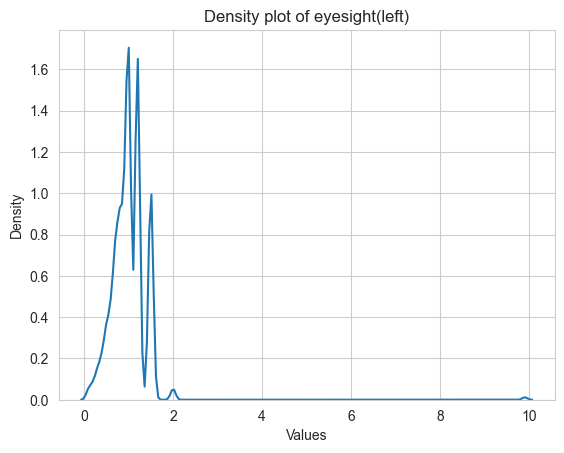

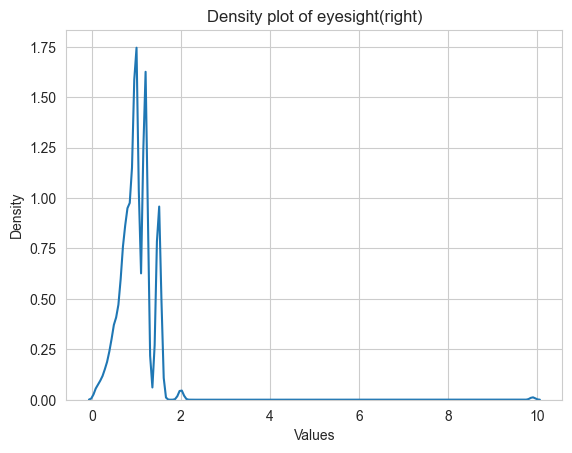

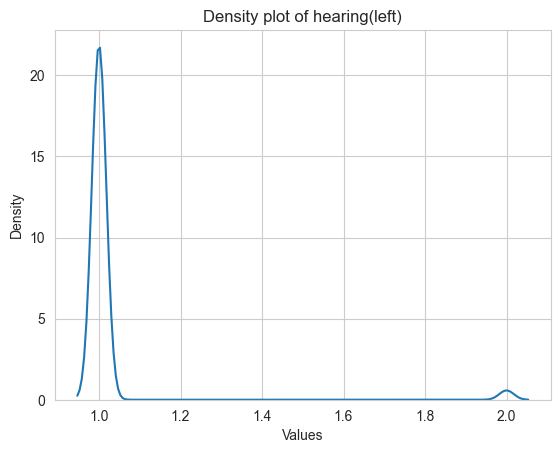

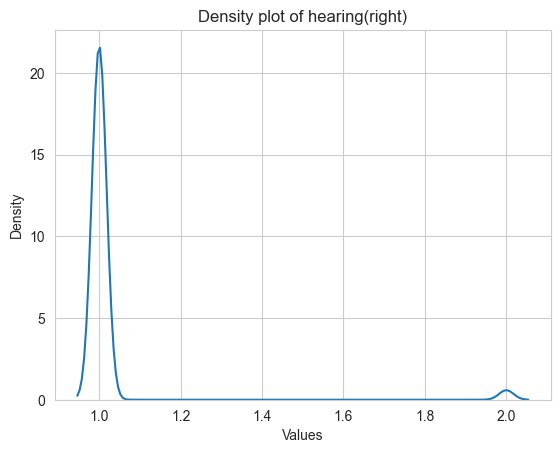

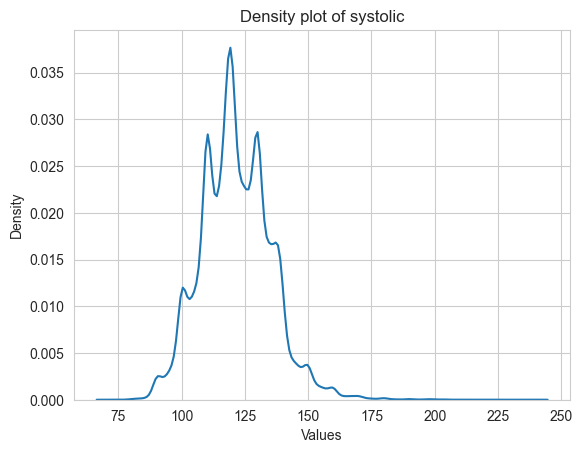

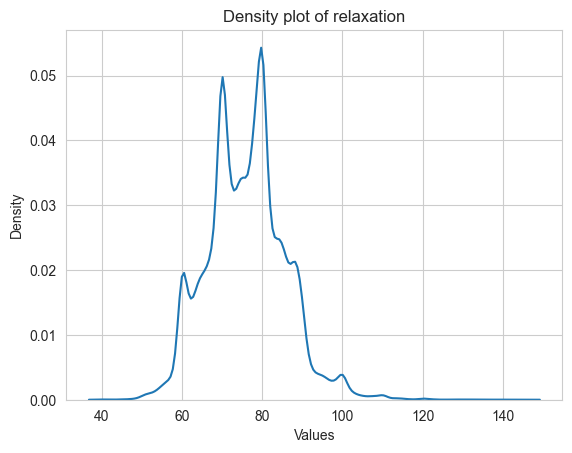

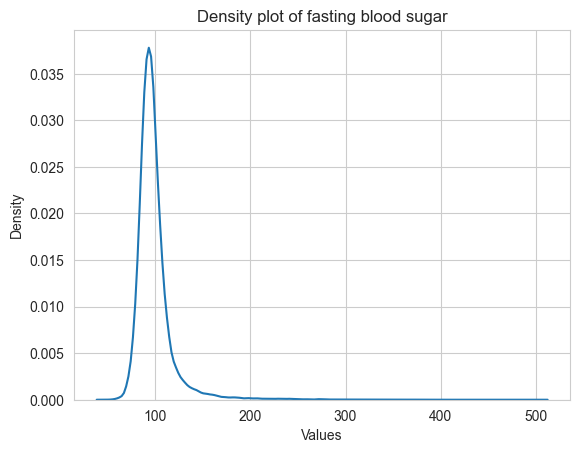

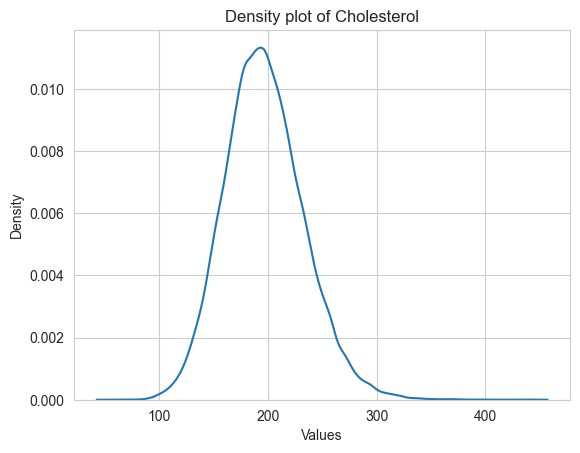

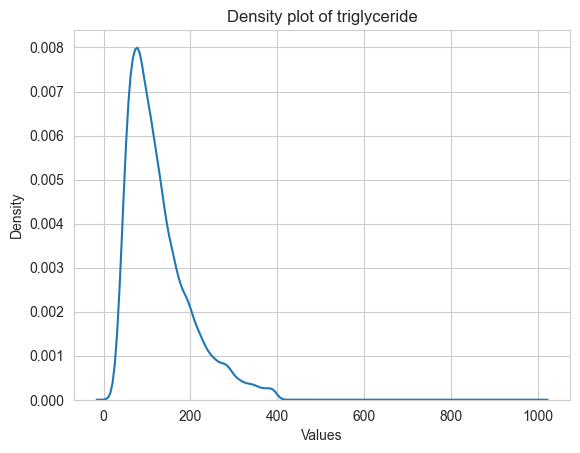

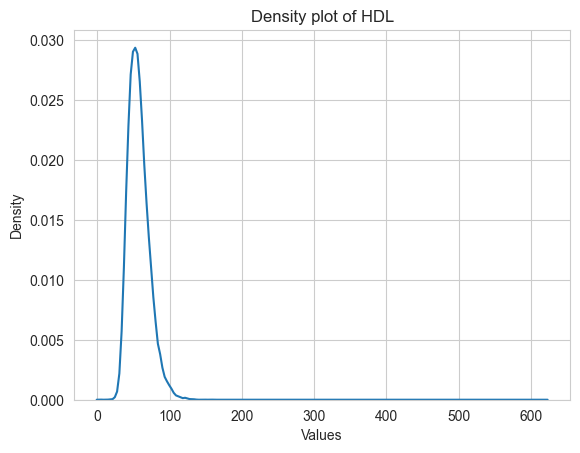

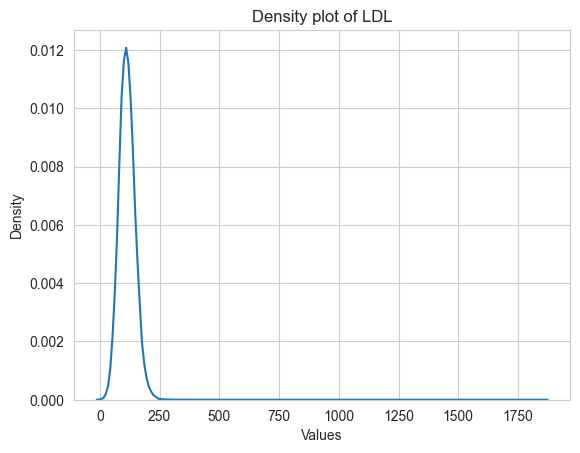

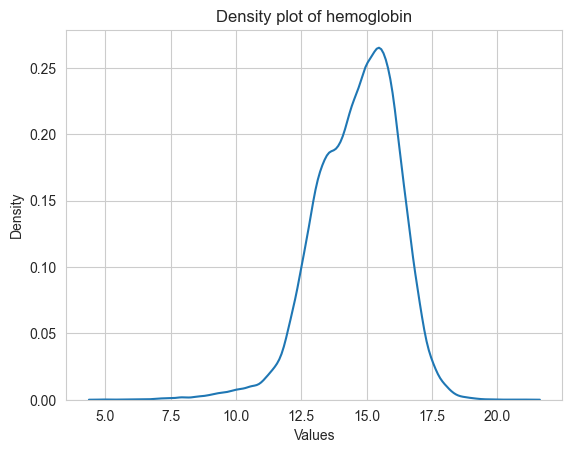

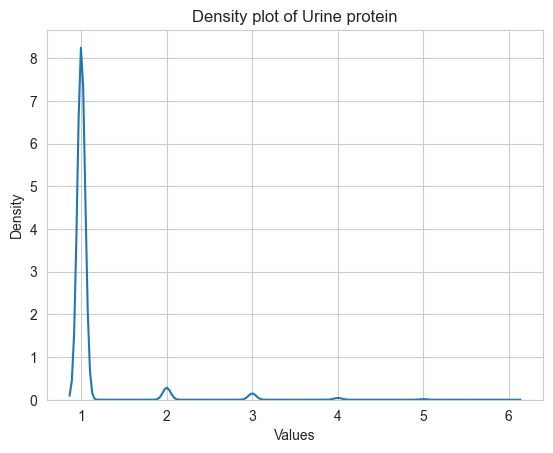

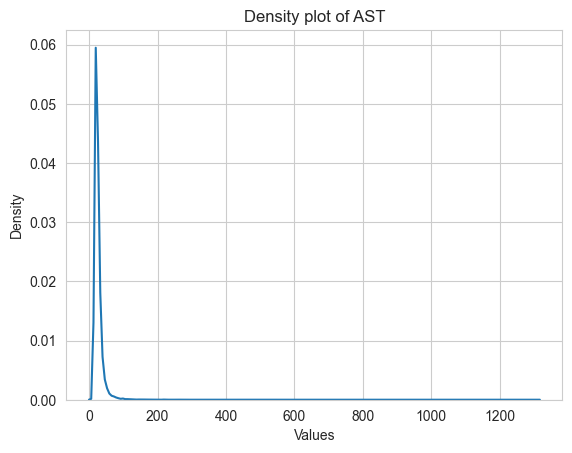

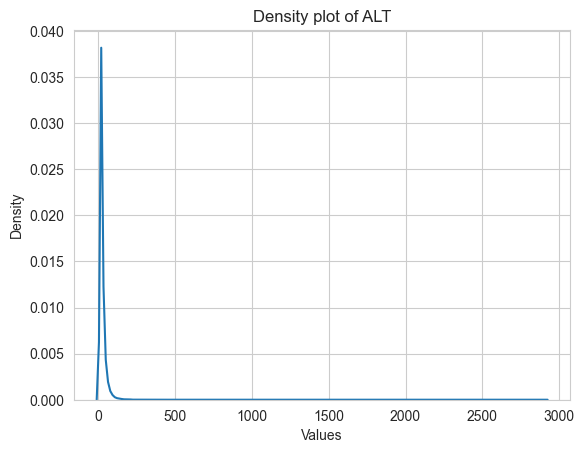

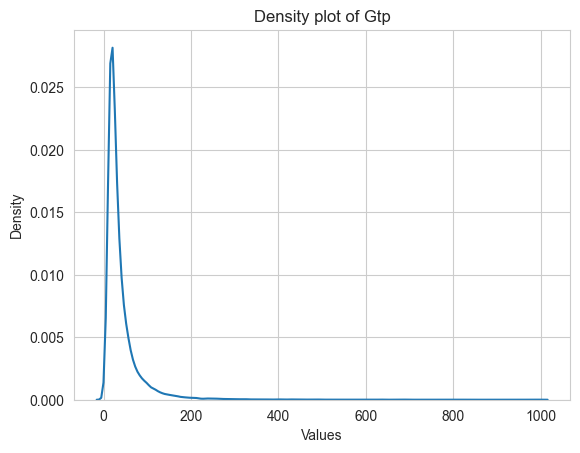

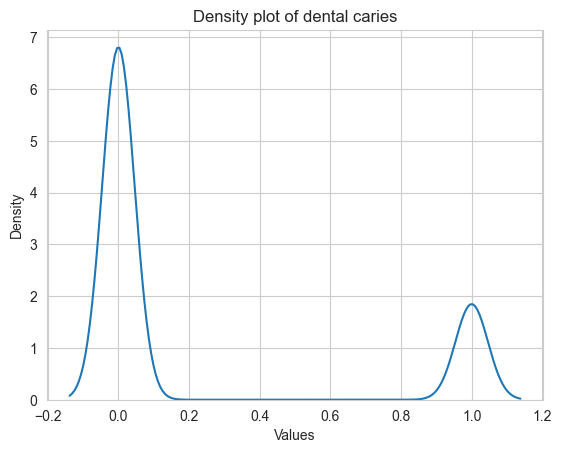

In [11]:
# Loop over each column in the DataFrame
for column_name in numeric_cols:
    
    sns.set_style("whitegrid")
    sns.kdeplot(data=df[column_name])
    plt.xlabel("Values")
    plt.title("Density plot of " + column_name)
    plt.show()

##### Here we use IQR to detect the outliers and be able to remove them

In [12]:
def detect_outliers(df, min_outlier_occurrences, columns):
    outlier_rows = []
    for col in columns:
        q1 = np.nanpercentile(df[col], 25)
        q3 = np.nanpercentile(df[col], 75)
        iqr = q3 - q1
        outlier_point = 1.5 * iqr
        outliers = df[(df[col] < q1 - outlier_point) | (df[col] > q3 + outlier_point)].index
        outlier_rows.extend(outliers)

    outlier_counts = Counter(outlier_rows)
    outlier_rows_to_drop = [row for row, count in outlier_counts.items() if count >= min_outlier_occurrences]

    return outlier_rows_to_drop


outlier_rows = detect_outliers(df, 5, df.select_dtypes(["float", "int"]).columns)
df = df.drop(outlier_rows)

In [13]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

- As we can see, we removed the outliers ..

In [14]:
df.shape

(55076, 26)

# Data Exploration and Visualization

In [15]:
df.describe()

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  55076.000000  55076.000000  55076.000000  55076.000000    55076.000000   
mean      44.151990    164.631055     65.732806     81.925763        1.013608   
std       12.040195      9.187266     12.669745      9.167680        0.485997   
min       20.000000    130.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     55.000000     75.800000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    135.000000    129.000000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     55076.000000   55076.000000    55076.000000  55076.000000   
mean          1.007388       1.023749        1.024312    121.319177   
std           0.474578       0.152268        0.154017     13.476235   
min           0.100000       1.000000        1.000000     71.000000   
25%           0.800000       1.000000        1.000000    112.000000   
50%           1.000000       1.000000        1.000000    120.000000   
75%           1.200000       1.000000        1.000000    130.000000   
max           9.900000       2.000000        2.000000    240.000000   

         relaxation  ...  triglyceride           HDL           LDL  \
count  55076.000000  ...  55076.000000  55076.000000  55076.000000   
mean      75.889153  ...    125.682784     57.322936    114.888627   
std        9.553612  ...     70.646349     14.696941     40.206037   
min       40.000000  ...      8.000000      4.000000      1.000000   
25%       70.000000  ...     74.000000     47.000000     92.000000   
50%       76.000000  ...    107.000000     55.000000    113.000000   
75%       82.000000  ...    159.000000     66.000000    136.000000   
max      140.000000  ...    999.000000    618.000000   1860.000000   

         hemoglobin  Urine protein  serum creatinine           AST  \
count  55076.000000   55076.000000      55076.000000  55076.000000   
mean      14.613616       1.081215          0.885082     25.758352   
std        1.558687       0.388059          0.220930     17.742679   
min        4.900000       1.000000          0.100000      6.000000   
25%       13.600000       1.000000          0.800000     19.000000   
50%       14.800000       1.000000          0.900000     23.000000   
75%       15.700000       1.000000          1.000000     28.000000   
max       20.900000       6.000000         11.600000   1090.000000   

                ALT           Gtp  dental caries  
count  55076.000000  55076.000000   55076.000000  
mean      26.409816     38.587425       0.210055  
std       28.082605     45.915942       0.407351  
min        1.000000      1.000000       0.000000  
25%       15.000000     17.000000       0.000000  
50%       21.000000     25.000000       0.000000  
75%       30.000000     43.000000       0.000000  
max     2914.000000    999.000000       1.000000  

[8 rows x 22 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55076 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55076 non-null  object 
 1   age                  55076 non-null  int64  
 2   height(cm)           55076 non-null  int64  
 3   weight(kg)           55076 non-null  int64  
 4   waist(cm)            55076 non-null  float64
 5   eyesight(left)       55076 non-null  float64
 6   eyesight(right)      55076 non-null  float64
 7   hearing(left)        55076 non-null  int64  
 8   hearing(right)       55076 non-null  int64  
 9   systolic             55076 non-null  int64  
 10  relaxation           55076 non-null  int64  
 11  fasting blood sugar  55076 non-null  int64  
 12  Cholesterol          55076 non-null  int64  
 13  triglyceride         55076 non-null  int64  
 14  HDL                  55076 non-null  int64  
 15  LDL                  55076 non-null 

<AxesSubplot: title={'center': 'Gender'}>

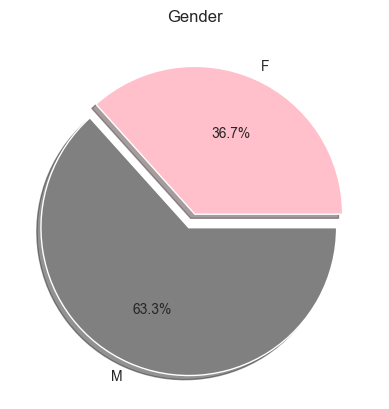

In [17]:
df.groupby('gender').size().plot(kind='pie', explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=["pink", "gray"], title="Gender")

<AxesSubplot: title={'center': 'Tartar'}, xlabel='Age', ylabel='Count'>

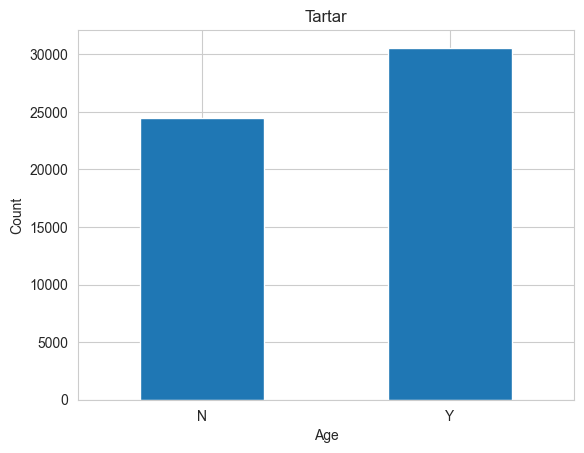

In [18]:
df.groupby('tartar').size().plot(kind='bar', title="Tartar", rot=0, xlabel='Age', ylabel='Count')

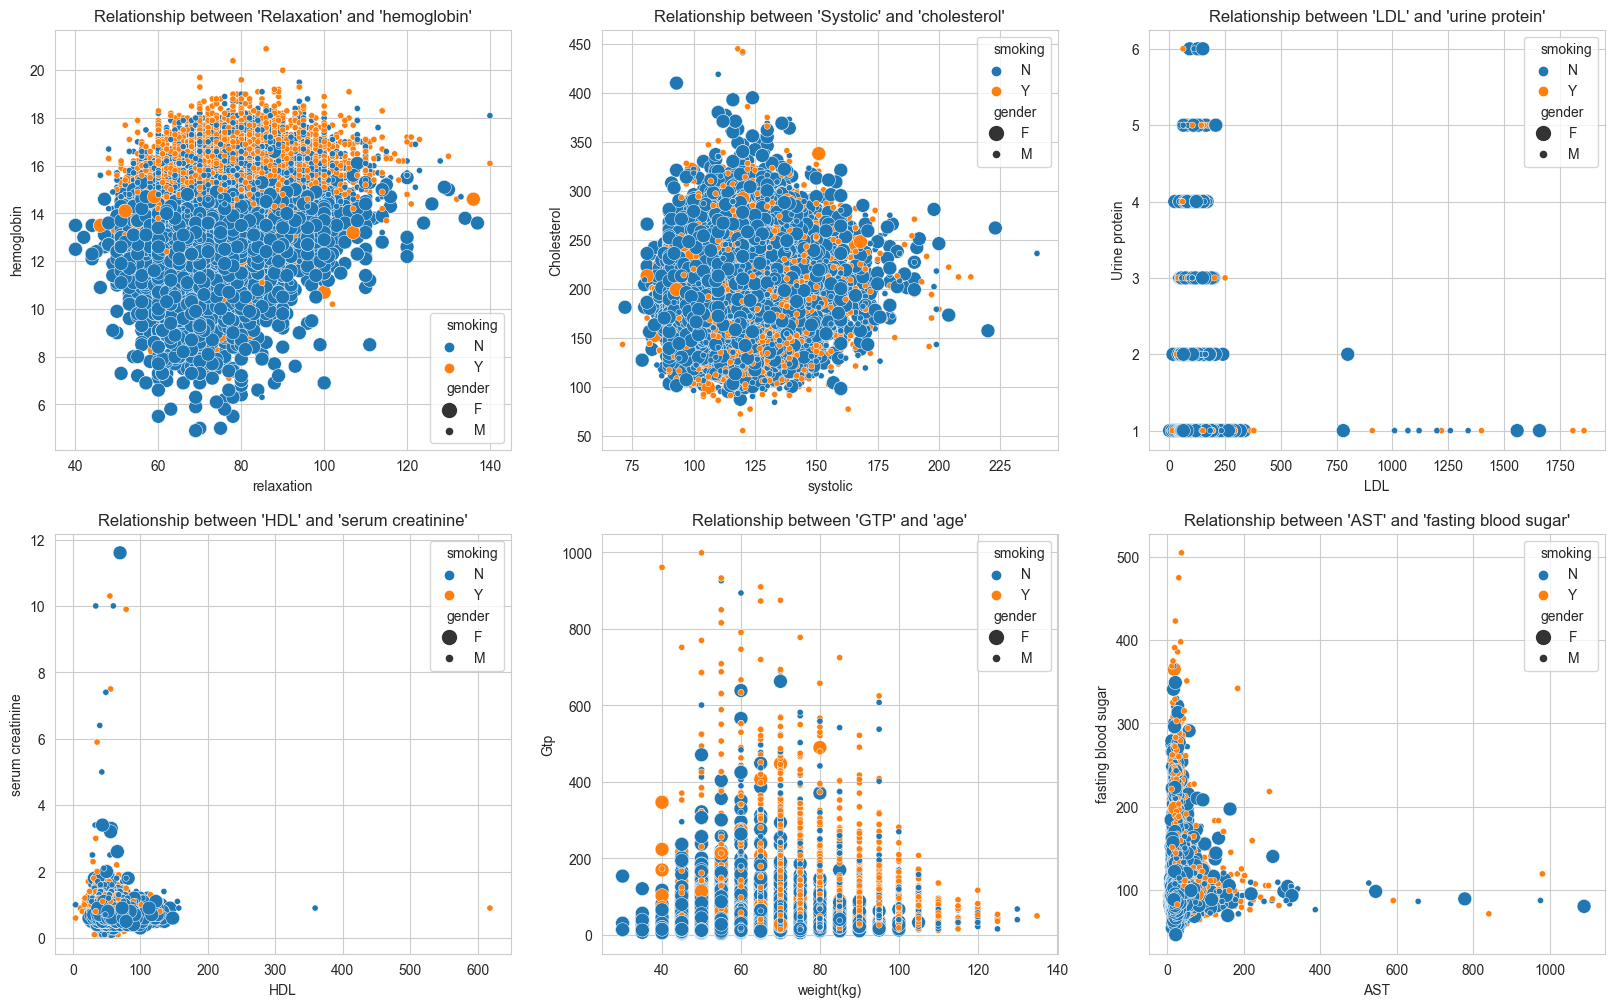

In [19]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "relaxation", y = "hemoglobin",
                hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'Relaxation' and 'hemoglobin'");

sns.scatterplot(ax = axes[1], x = "systolic", y = "Cholesterol", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'Systolic' and 'cholesterol'");

sns.scatterplot(ax = axes[2], x = "LDL", y = "Urine protein", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'LDL' and 'urine protein'");

sns.scatterplot(ax = axes[3], x = "HDL", y = "serum creatinine", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'HDL' and 'serum creatinine'");

sns.scatterplot(ax = axes[4], x = "weight(kg)", y = "Gtp", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'GTP' and 'age'");

sns.scatterplot(ax = axes[5], x = "AST", y = "fasting blood sugar", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'AST' and 'fasting blood sugar'");

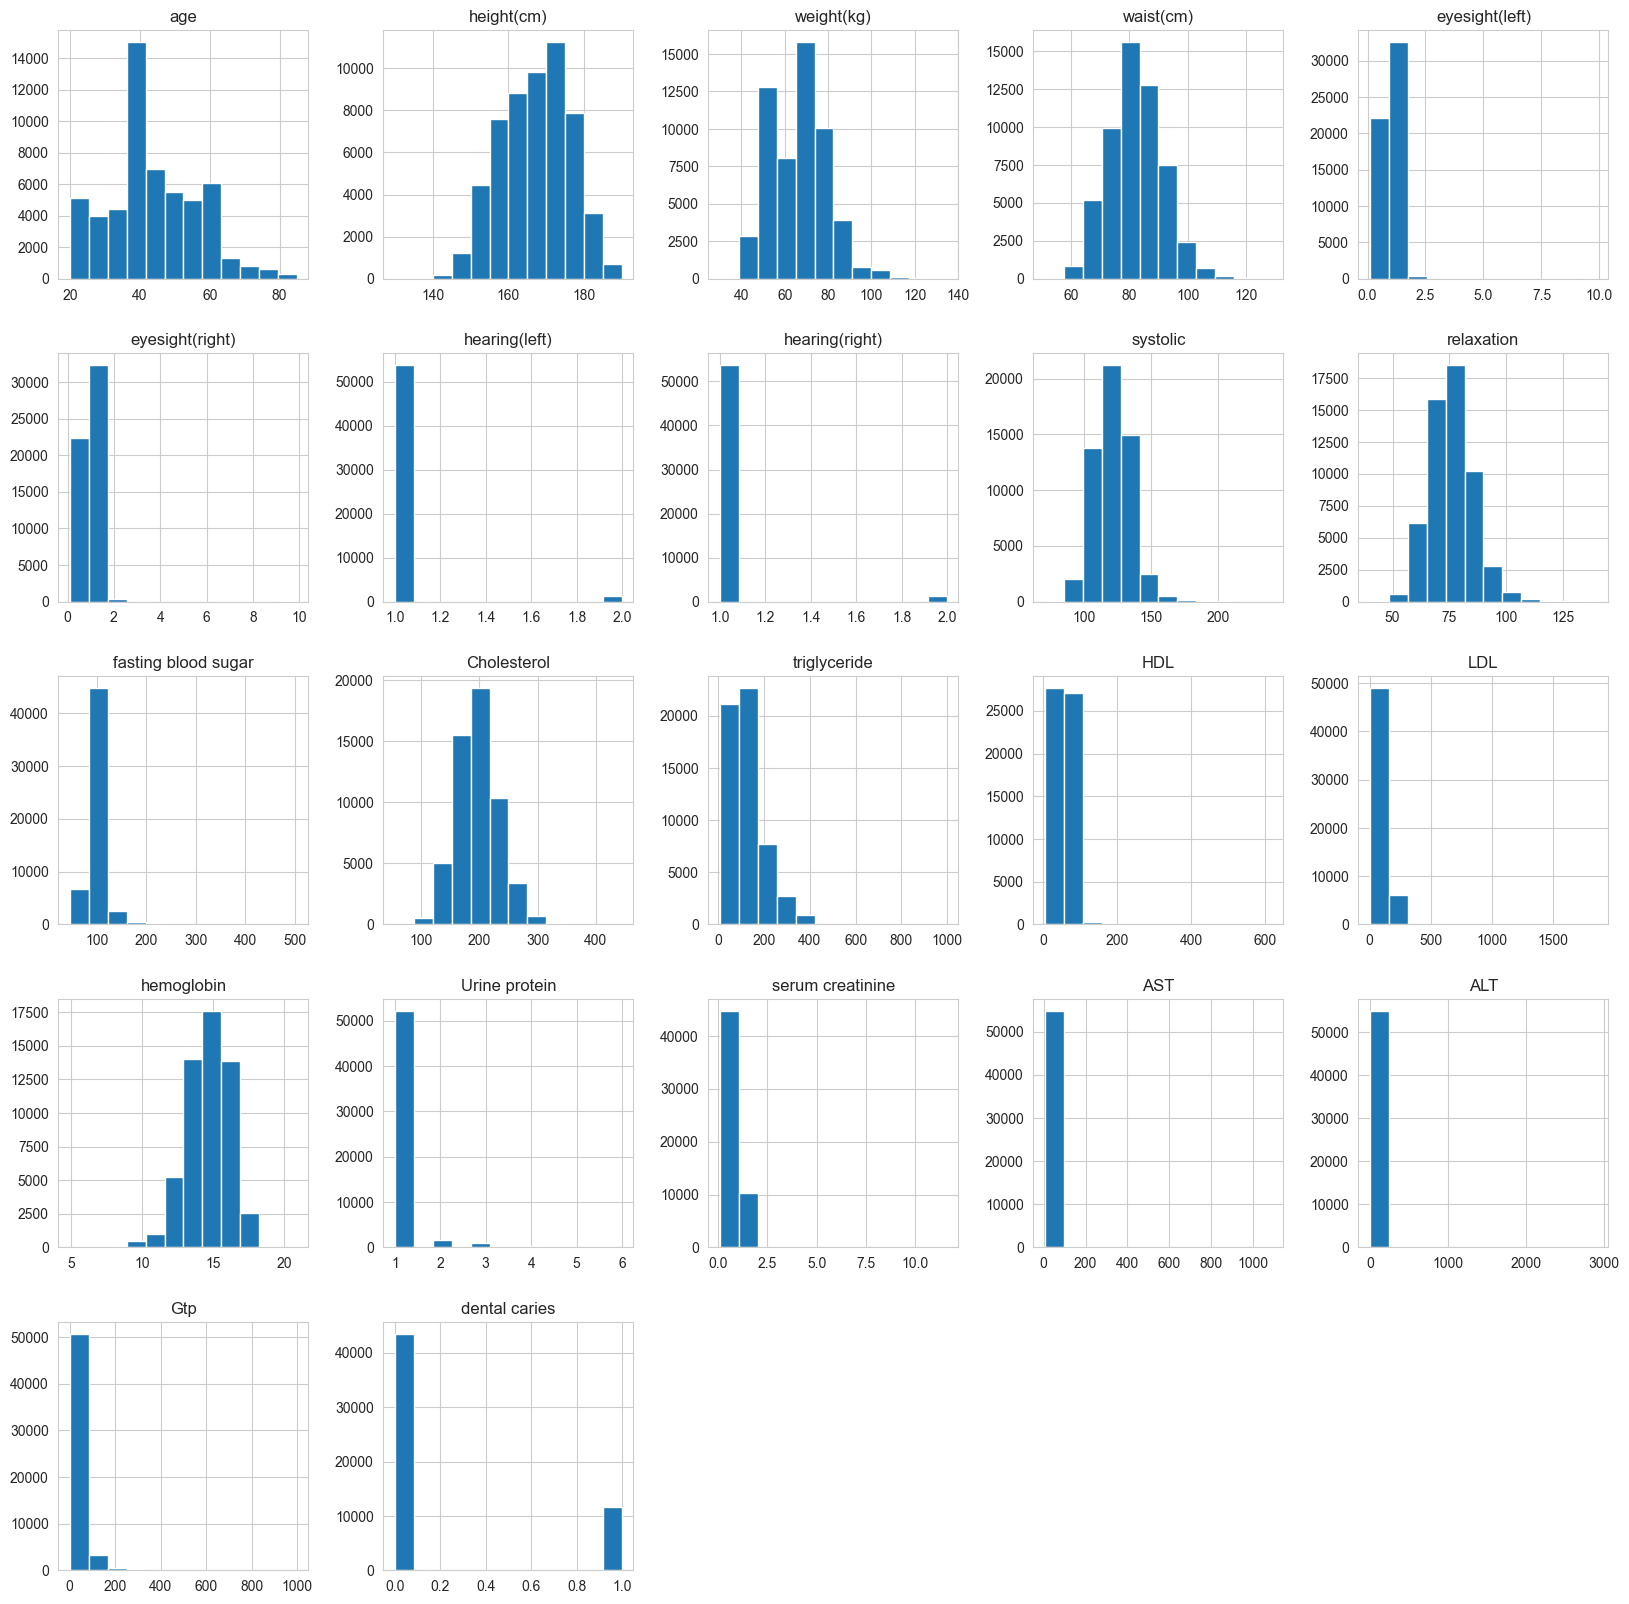

In [20]:
df.hist(figsize = (20, 20), bins = 12, legend = False);

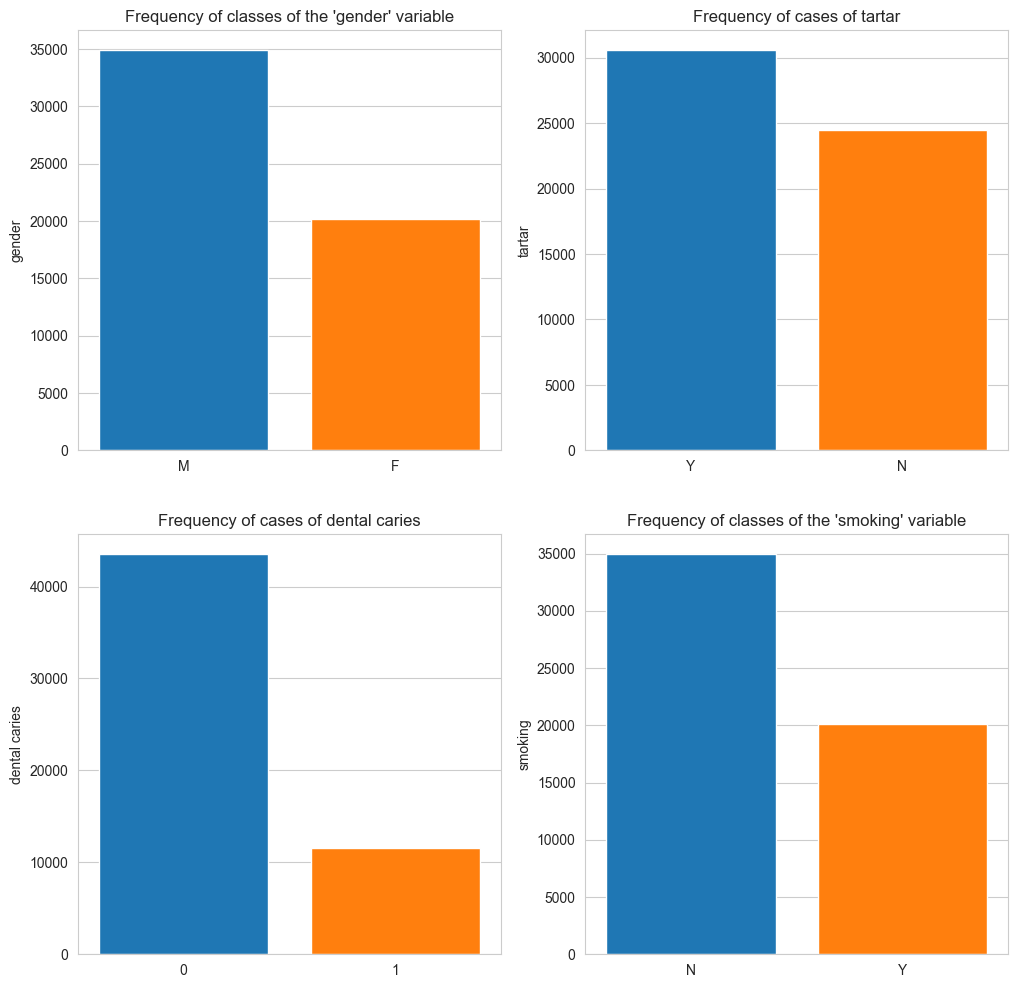

In [21]:
fig, axes = plt.subplots(2, 2, figsize = (12, 12))
axes = axes.flatten()

sns.barplot(ax = axes[0],
            x = df["gender"].value_counts().index,
            y = df["gender"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of the 'gender' variable");

sns.barplot(ax = axes[1],
            x = df["tartar"].value_counts().index,
            y = df["tartar"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of tartar");

sns.barplot(ax = axes[2],
            x = df["dental caries"].value_counts().index,
            y = df["dental caries"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of dental caries");

sns.barplot(ax = axes[3],
            x = df["smoking"].value_counts().index,
            y = df["smoking"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of the 'smoking' variable");

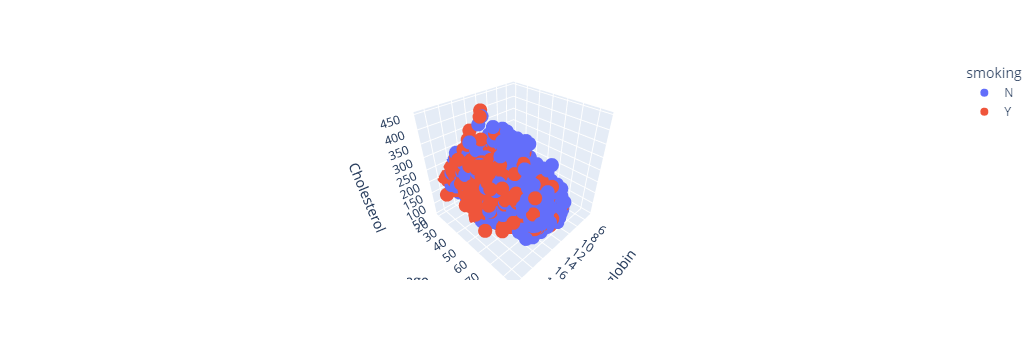

In [22]:
fig = px.scatter_3d(df, 
                    x = "hemoglobin",
                    y = "age",
                    z = "Cholesterol",
                    color="smoking")
fig.show();

### Observations based on the last explorations:<br>
1. The % of smokers within each blood pressure group is the highest among those who have hypertensive crisis and the least among those with normal blood pressure
2. Maximum people in the dataset have normal blood pressure
3. The highest number of nonsmokers is in the normal blood pressure
    Information source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
4. HDL (the good cholesterol) is higher for non-smokers.
5. Average LDL (the bad cholesterol) is higher for smokers.
6. AST and ALT are healthy for both smoker and non-smoker groups. GTP is at risk for smokers.

## Encoding and Splitting the data

In [23]:
lbe = LabelEncoder()
lbe.fit_transform(df["gender"])
df["gender"] = lbe.fit_transform(df["gender"])
lbe.fit_transform(df["tartar"])
df["tartar"] = lbe.fit_transform(df["tartar"])
lbe.fit_transform(df["oral"])
df["oral"] = lbe.fit_transform(df["oral"])
lbe.fit_transform(df["smoking"])
df["smoking"] = lbe.fit_transform(df["smoking"])

In [24]:
df.head()

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       0   40         155          60       81.3             1.2   
1       0   40         160          60       81.0             0.8   
2       1   55         170          60       80.0             0.8   
3       1   40         165          70       88.0             1.5   
4       0   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  hemoglobin  \
0              1.0              1               1       114  ...        12.9   
1              0.6              1               1       119  ...        12.7   
2              0.8              1               1       138  ...        15.8   
3              1.5              1               1       100  ...        14.7   
4              1.0              1               1       120  ...        12.5   

   Urine protein  serum creatinine  AST  ALT  Gtp  oral  dental caries  \
0              1               0.7   18   19   27     0              0   
1              1               0.6   22   19   18     0              0   
2              1               1.0   21   16   22     0              0   
3              1               1.0   19   26   18     0              0   
4              1               0.6   16   14   22     0              0   

   tartar  smoking  
0       1        0  
1       1        0  
2       0        1  
3       1        0  
4       0        0  

[5 rows x 26 columns]

In [25]:
# select dependent variable (label)
y = df["smoking"]

# select independent variable (estimator)
x = df.drop("smoking", axis = 1)

In [26]:
# Train-Test-Split   
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, shuffle = True, random_state=1)

## Scaling the data

In [27]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Classification Models

- From the previous graph will observe that the minimum error rate approximately equal 25 % and this percentage occurs when K value = 31

## Support Vector Machine (SVM) Model 

In [28]:
svm = SVC(kernel='rbf')
# fit the model with data
svm.fit(x_train, y_train)
# predict with test dataset
y_predict_SVM = svm.predict(x_test)
print(classification_report(y_test,y_predict_SVM))
accuracy_Score_SVM = metrics.accuracy_score(y_test, y_predict_SVM)
print('SVM model accuracy is: {:.2f}%'.format(accuracy_Score_SVM*100))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      6990
           1       0.67      0.73      0.70      4026

    accuracy                           0.77     11016
   macro avg       0.75      0.76      0.75     11016
weighted avg       0.77      0.77      0.77     11016

SVM model accuracy is: 76.80%


### Confusion Matrix for SVM

Confusion Matrix for SVM :
 [[5518 1472]
 [1084 2942]] 



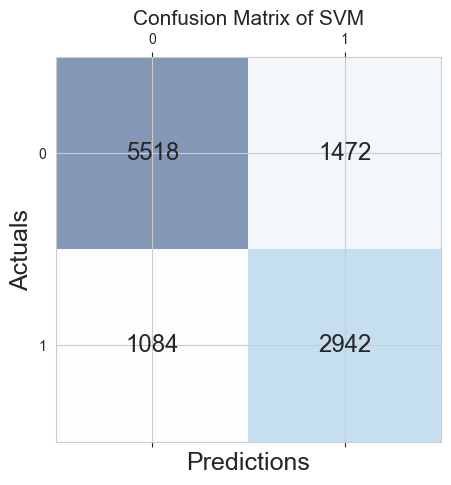

In [29]:
cm = metrics.confusion_matrix(y_test, y_predict_SVM)
print('Confusion Matrix for SVM :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of SVM', fontsize=15)
plt.show()

## Random Forest Classifier  Model 

In [30]:
models = RandomForestClassifier(n_estimators=500)
models.fit(x_train, y_train)
# predict with test dataset
y_predict_random = models.predict(x_test)
print(classification_report(y_test,y_predict_random))
accuracy_Score_random = metrics.accuracy_score(y_test, y_predict_random)
print('RandomForest model accuracy is: {:.2f}%'.format(accuracy_Score_random*100))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6990
           1       0.76      0.80      0.78      4026

    accuracy                           0.84     11016
   macro avg       0.82      0.83      0.82     11016
weighted avg       0.84      0.84      0.84     11016

RandomForest model accuracy is: 83.57%


### Confusion Matrix for Random Forest Classifier

Confusion Matrix for Random Forest Classifier :
 [[5996  994]
 [ 816 3210]] 



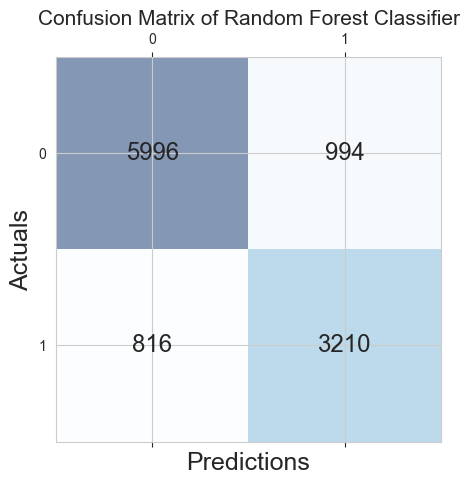

In [31]:
cm = metrics.confusion_matrix(y_test, y_predict_random)
print('Confusion Matrix for Random Forest Classifier :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Random Forest Classifier', fontsize=15)
plt.show()

### XGBoost model

#### Why I used this model to this data ?<br>
1. `High-performance`: XGBoost is known for delivering accurate predictions and has a strong track record in machine learning competitions and real-world applications.

2. `Handling complex relationships`: XGBoost is effective at capturing intricate patterns and relationships between different features in the dataset.

3. `Feature importance`: XGBoost can identify the most important factors in making predictions, helping us understand the key signals related to smoking behavior.

4. `Handling imbalanced data`: XGBoost has techniques to handle imbalanced datasets, where the number of samples in different classes is skewed, improving its performance in classifying smoking behavior.

5. `Flexibility and customization`: XGBoost provides a wide range of settings that can be adjusted to optimize model performance for the specific dataset, allowing us to fine-tune the model accordingly.

6. `Ensemble learning`: XGBoost utilizes an ensemble of decision trees, combining their predictions to make a final decision. This ensemble approach helps to reduce overfitting and improve generalization performance.

In [32]:
xgb_model = XGBClassifier(n_estimators = 600)
xgb_model.fit(x_train, y_train)
pred_xgb = xgb_model.predict(x_test)
print(classification_report(y_test,pred_xgb))
accuracy_Score_xgb = metrics.accuracy_score(y_test, pred_xgb)
print('XGBoosting model accuracy is: {:.2f}%'.format(accuracy_Score_xgb*100))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6990
           1       0.76      0.76      0.76      4026

    accuracy                           0.82     11016
   macro avg       0.81      0.81      0.81     11016
weighted avg       0.82      0.82      0.82     11016

XGBoosting model accuracy is: 82.44%


Confusion Matrix for XGBoost model

Confusion Matrix for XGBoosting Classifier :
 [[6024  966]
 [ 968 3058]] 



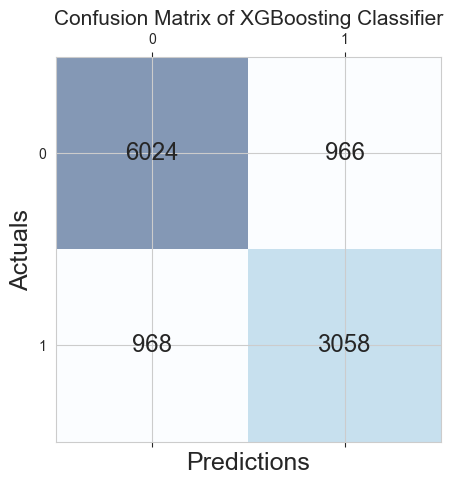

In [33]:
cm = metrics.confusion_matrix(y_test, pred_xgb)
print('Confusion Matrix for XGBoosting Classifier :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of XGBoosting Classifier', fontsize=15)
plt.show()

### ROC Curve

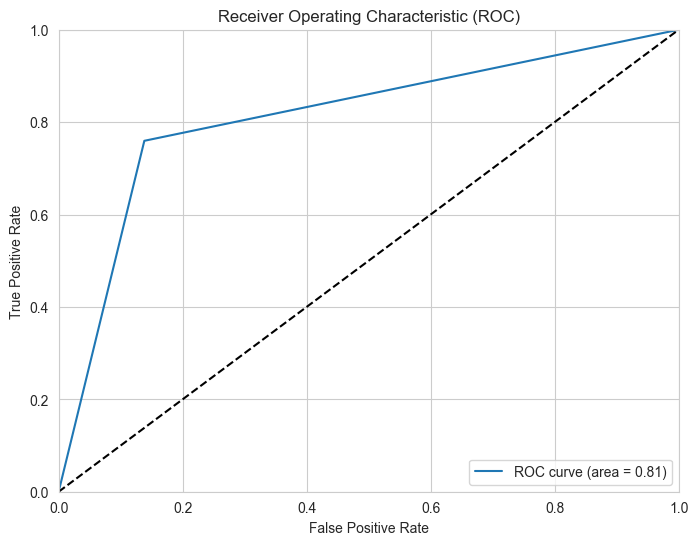

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb)
auc = roc_auc_score(y_test, pred_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Feature Importance

gender: 0.7748702764511108
dental caries: 0.014836056157946587
age: 0.014363131485879421
Gtp: 0.01405586302280426
tartar: 0.011503680609166622
hearing(right): 0.011392632499337196
serum creatinine: 0.01012782659381628
triglyceride: 0.009933159686625004
ALT: 0.009799203835427761
height(cm): 0.009401359595358372
Urine protein: 0.009371972642838955
hemoglobin: 0.009164990857243538
HDL: 0.008825352415442467
waist(cm): 0.00881659984588623
weight(kg): 0.008771190419793129
systolic: 0.008725248277187347
AST: 0.00867138709872961
LDL: 0.008668730035424232
relaxation: 0.008487105369567871
fasting blood sugar: 0.008320373483002186
eyesight(right): 0.008095309138298035
eyesight(left): 0.00800685491412878
hearing(left): 0.007930856198072433
Cholesterol: 0.007860859856009483
oral: 0.0


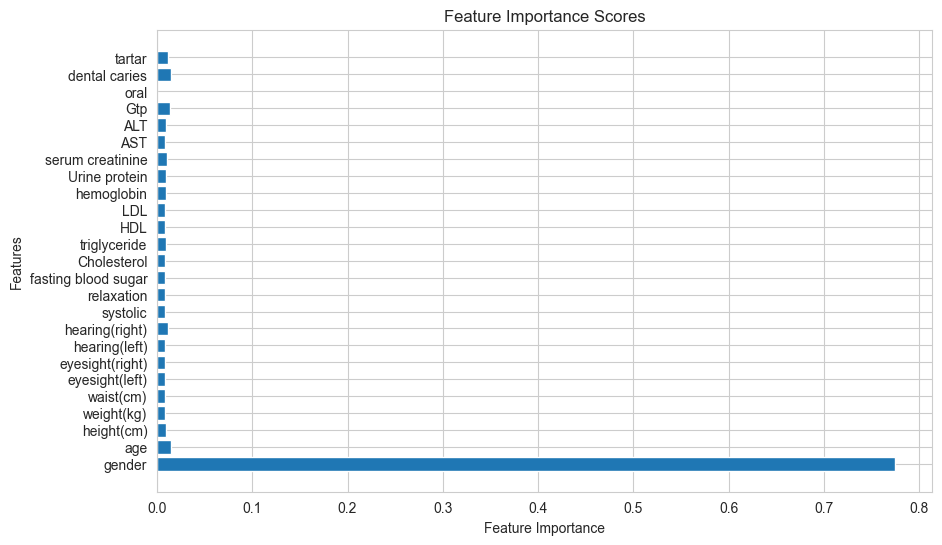

In [34]:
# Get the feature importance scores
importance_scores = xgb_model.feature_importances_

# Get the names of the features
feature_names = x.columns

# Create a dictionary with feature names as keys and importance scores as values
feature_importance = dict(zip(feature_names, importance_scores))

# Sort the features based on their importance scores
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance in descending order
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_scores)), importance_scores, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()